# Lambda School, Intro to Data Science, Day 4

## Inferential Statistics Assignment

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
df.dropna(subset=features, inplace=True)

In [ ]:

age = df['age']
fare = df['fare']
df.head(500)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,3,male,NaN,0,0,14.4583,C,Third,man,True,NaN,Cherbourg,no,True
496,1,1,female,54.0,1,0,78.2667,C,First,woman,False,D,Cherbourg,yes,False
497,0,3,male,NaN,0,0,15.1000,S,Third,man,True,NaN,Southampton,no,True
498,0,1,female,25.0,1,2,151.5500,S,First,woman,False,C,Southampton,no,False


In [ ]:

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

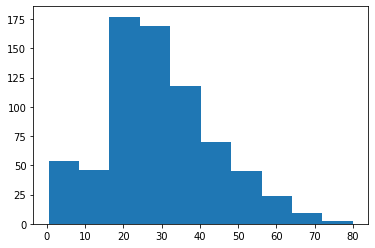

In [ ]:
plt.hist(age)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

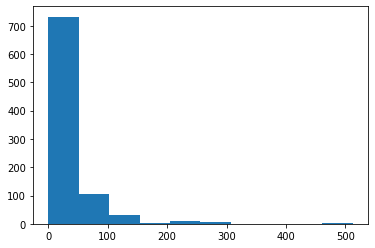

In [ ]:
plt.hist(fare)

# Clumsy Carl

Re-do the Clumsy Carl problem -- but suppose that Carl broke **2** of 5 dishes. What's the p-value?

Think, and be ready to discuss: Would you reject the null hypothesis?

Suggestion: You can look at the lecture notebook, but **don't copy-paste** from it!

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

---

Here's the problem restated:

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


In [ ]:
dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']

[2, 0, 1, 2, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 3, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 3, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 3, 2, 3, 1, 0, 2, 0, 2, 3, 0, 0, 2, 0, 3, 3, 0, 3, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 3, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 3, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 4, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 3, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 3, 1, 3, 0, 2, 2, 2, 0, 1, 4, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 3, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 2, 4, 1, 

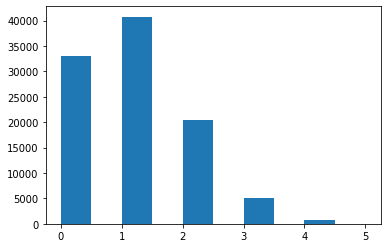

In [ ]:
def test():
    dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']
    breakers = [random.choice(dishwashers) for broken_dish in range(5)]
    return breakers.count('Carl')

tests = [test() for _ in range(100000)]

plt.hist(tests);